# Sentence Mapper Ideas Testing

In [1]:
%load_ext autoreload
%autoreload 2

import json
from src.pipeline import SentenceMapperPipeline
from src.visualization import SentenceMapperVisualizer

In [2]:
def load_jsonl_example(file_path: str, index: int = 0) -> dict[str, str]:
    """Load a specific example from a JSONL file.

    Args:
        file_path: Path to the JSONL file
        index: Index of the example to load (default: 0)

    Returns:
        Dictionary with keys: id, pid, input, output
    """
    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            if i == index:
                return json.loads(line)
    raise IndexError(f"Index {index} not found in file")

In [33]:
# Initialize pipeline
pipeline = SentenceMapperPipeline(
    embedding_model_name="minishlab/potion-base-8M",
    chunk_size=2048,
    chunk_overlap=0,
    strategy="balanced"
)

In [39]:
# Load data
data = load_jsonl_example(
    "data/gov_report/train.jsonl",
    index=0
)

masks = []
x_opts = []
labels = []
for objective_percentage in [0.1, 0.3, 0.5]:
    result_filtered = pipeline.process_document(data["input"], objective_percentage=objective_percentage)
    masks.append(result_filtered['mask'])
    x_opts.append(result_filtered['x_opt'])
    labels.append(f"{objective_percentage*100:.0f}%")


In [41]:
print(result_filtered["selected_text"])


On December 17, 2008, Cuban President Raúl Castro offered to exchange some imprisoned Cuban political dissidents for five Cubans imprisoned for espionage in the United States since 2001.  (...) agricultural exports to Cuba and on family travel to Cuba.  (...) On November 26, 2008, Cuban President Raúl Castro stated in an interview that he would be willing to meet with President-elect Barack Obama, and suggested the U.S.  (...) 
On November 24, 2008, the Government Accountability Office (GAO) issued a second report examining USAID's Cuba democracy program.  (...) (U.S. GAO, Foreign Assistance: Continued Efforts Needed to Strengthen USAID's Oversight of U.S. Democracy Assistance for Cuba , GAO-09-165, November 2008.)
 (...) restrictions on Cuban-American travel to Cuba.
 (...) The United States provided assistance through non-governmental organizations.  (...) In the aftermath of the hurricanes, several legislative initiatives were introduced – S.Amdt.  (...) (See " Aftermath of 2008 Hu

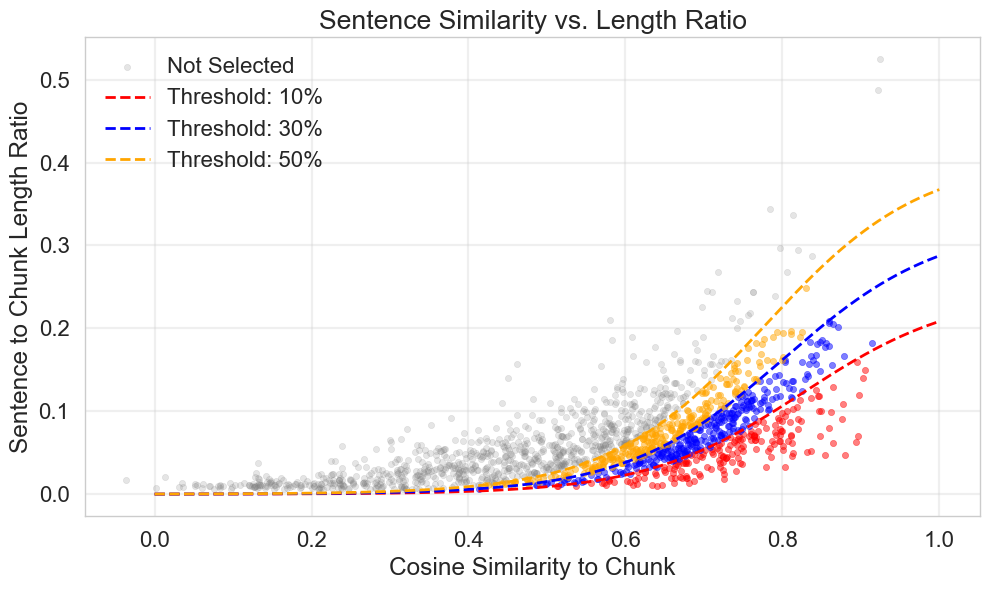

In [35]:
# Visualize results
visualizer = SentenceMapperVisualizer(pipeline.optimizer.strategy)

# Plot filtered sentences
visualizer.plot_similarity_vs_ratio(
    similarities=result_filtered['all_similarities'],
    ratios=result_filtered['ratios'],
    mask=masks,
    x_opt=x_opts,
    labels=labels,
    title=f"Sentence Similarity vs. Length Ratio",
    save_path=f"data/img/{data['id']}_comparison.png"
)

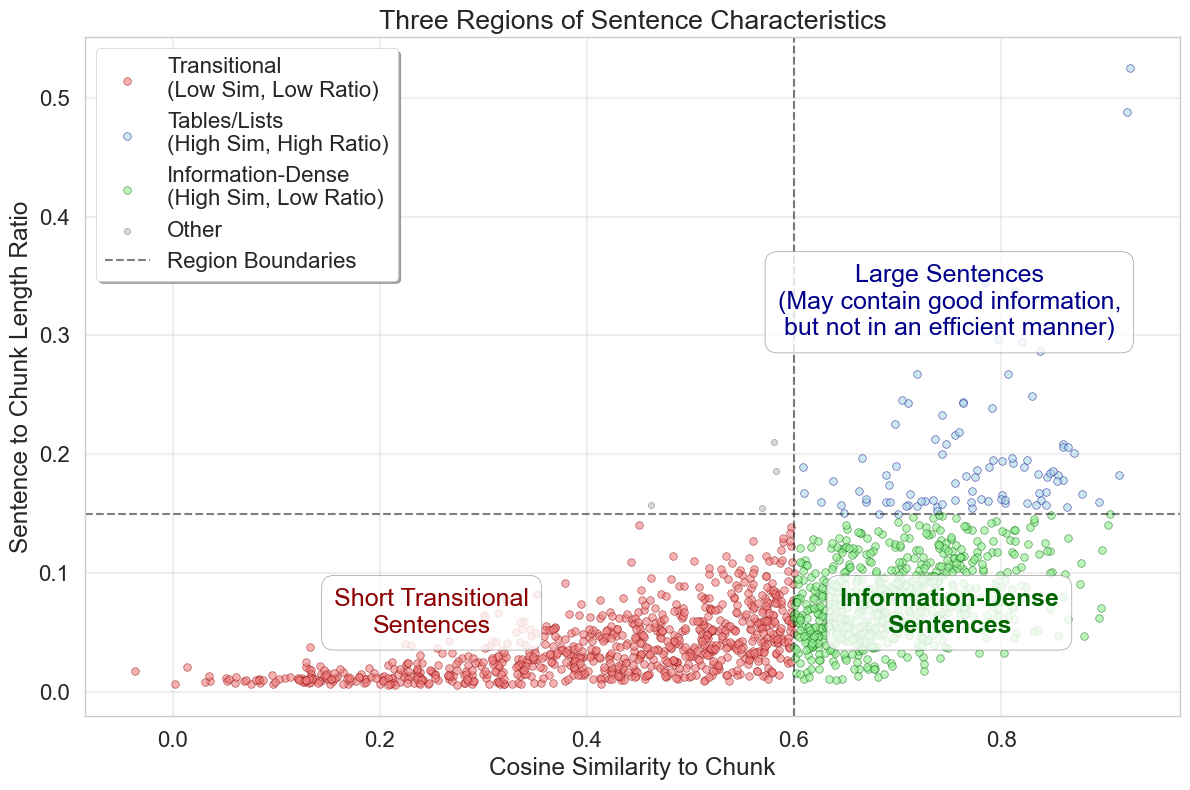

In [36]:
# Visualize the three characteristic regions
visualizer.plot_three_regions(
    similarities=result_filtered['all_similarities'],
    ratios=result_filtered['ratios'],
    save_path=f"data/img/{data['id']}_three_regions.png"
)

In [38]:
objective_percentage = 0.3
result_filtered = pipeline.process_document(
    data["input"],
    objective_percentage=0.3
)

visualizer.export_highlighted_text(
    sentences=result_filtered['sentences'],
    mask=result_filtered['mask'],
    output_path=f"data/img/{data['id']}_{objective_percentage*100:.0f}.html"
)